In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [291]:
df = sns.load_dataset("titanic")

In [292]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [294]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [295]:
df.shape

(891, 15)

In [296]:
df.describe() # descriptive statistics

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [297]:
df[["sex", "embarked", "class", "deck", "who", "adult_male", "embark_town", "alive", "alone"]].describe()

,sex,embarked,class,deck,who,adult_male,embark_town,alive,alone
count,891,889,891,203,891,891,889,891,891
unique,2,3,3,7,3,2,3,2,2
top,male,S,Third,C,man,True,Southampton,no,True
freq,577,644,491,59,537,537,644,549,537


In [298]:
df["deck"].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [299]:
df.groupby("deck")["fare"].describe()
# min "A", "B" deck fare is zero. That's not possible. we should fill them.

# And as we understand from the data "fare" is related with "deck". so we should focus on these two variables.

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,13.0,18.696792,11.728217,7.6500,7.7500,13.00000,26.00000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000


In [300]:
df.groupby("deck")["fare"].describe().sort_values(by="mean")
# minimum mean "fare" is "F" deck

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000
F,13.0,18.696792,11.728217,7.6500,7.7500,13.00000,26.00000,39.0000
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292


In [301]:
df[df["fare"] < 10]["deck"].value_counts(dropna=False)
# most frequent deck is "F"

NaN    327
F        4
B        3
E        1
A        1
G        0
D        0
C        0
Name: deck, dtype: int64

#### let's fill 327 NaN deck value with "F"

In [302]:
df[(df["fare"] < 10) & (df["deck"].isnull())].index

Int64Index([  0,   2,   4,   5,  12,  14,  19,  22,  26,  28,
            ...
            868, 870, 873, 875, 876, 877, 878, 881, 884, 890],
           dtype='int64', length=327)

In [303]:
df.loc[df[(df["fare"] < 10) & (df["deck"].isnull())].index, "deck"] = "F"

In [304]:
df[df["fare"] < 10]["deck"].value_counts(dropna=False)

F    331
B      3
E      1
A      1
G      0
D      0
C      0
Name: deck, dtype: int64

In [305]:
df.groupby("deck")["fare"].describe()
# min "A", "B", "F" deck fare is zero. That's not possible. we should fill them.

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,340.0,8.012731,3.456975,0.0000,7.5500,7.85420,8.05000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000


In [306]:
df[(df["fare"]==0) & (df["deck"]=="F")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,F,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,F,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,F,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,F,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,F,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,F,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,F,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,F,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,F,Southampton,no,True
674,0,2,male,NaN,0,0,0.0,S,Second,man,True,F,Southampton,no,True


In [307]:
med_F = df.groupby("deck")["fare"].describe()["50%"]["F"]
med_F
# we will fill "fare" for "deck F" with its median value

7.8542

In [308]:
df.loc[df[(df["fare"]==0) & (df["deck"]=="F")].index, "fare"] = med_F

In [309]:
df[(df["fare"]==0) & (df["deck"]=="F")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [310]:
df.groupby("deck")["fare"].describe()
# min "A", "B", "F" deck fare is zero. That's not possible. we should fill them.

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,340.0,8.289938,3.098676,4.0125,7.7333,7.85420,8.05000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000


In [311]:
df[df["fare"] == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True
815,0,1,male,NaN,0,0,0.0,S,First,man,True,B,Southampton,no,True


In [312]:
df[df["deck"] == "A"][["deck","fare"]].sort_values(by="fare")

,deck,fare
806,A,0.0000
284,A,26.0000
630,A,30.0000
174,A,30.6958
209,A,31.0000
96,A,34.6542
23,A,35.5000
647,A,35.5000
556,A,39.6000
583,A,40.1250


In [313]:
df[df["deck"]=="A"]["fare"].median()

35.5

In [314]:
#other method
df.groupby("deck").median()["fare"]["A"]

35.5

In [315]:
df[(df["deck"]=="A") & (df["fare"]==0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True


In [316]:
df.loc[df[(df["deck"]=="A") & (df["fare"]==0)].index, "fare"] = df[df["deck"]=="A"]["fare"].median()

In [317]:
df[df["fare"] == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
815,0,1,male,NaN,0,0,0.0,S,First,man,True,B,Southampton,no,True


In [318]:
df.groupby("deck")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,41.990553,14.358954,26.0000,32.8271,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,340.0,8.289938,3.098676,4.0125,7.7333,7.85420,8.05000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000


In [319]:
df.groupby("deck")["fare"].median()["B"]

80.0

In [320]:
df.loc[df[(df["deck"]=="B") & (df["fare"]==0)].index, "fare"] = df.groupby("deck")["fare"].median()["B"]

In [321]:
df[df["fare"]==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [322]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           361
embark_town      2
alive            0
alone            0
dtype: int64

In [323]:
df["deck"].value_counts(dropna=False)

NaN    361
F      340
C       59
B       47
D       33
E       32
A       15
G        4
Name: deck, dtype: int64

In [324]:
df.groupby("deck")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,41.990553,14.358954,26.0000,32.8271,35.50000,50.24790,81.8583
B,47.0,116.910019,106.881395,5.0000,57.9792,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,340.0,8.289938,3.098676,4.0125,7.7333,7.85420,8.05000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000


In [325]:
df["deck"].value_counts(dropna=False)

NaN    361
F      340
C       59
B       47
D       33
E       32
A       15
G        4
Name: deck, dtype: int64

In [326]:
# Let's share the remaining nan values proportionally to the other "deck classes" except "F"


In [327]:
value_counts = df["deck"].value_counts().to_list()
value_counts

[340, 59, 47, 33, 32, 15, 4]

In [328]:
value_counts.remove(max(value_counts))
value_counts

[59, 47, 33, 32, 15, 4]

In [329]:
total = sum(value_counts)
total

190

In [330]:
class_weight = []
for i in value_counts:
    class_weight.append(i / total)
class_weight

[0.3105263157894737,
 0.24736842105263157,
 0.1736842105263158,
 0.16842105263157894,
 0.07894736842105263,
 0.021052631578947368]

In [331]:
no_of_fill = []
for i in class_weight:
    no_of_fill.append(round(i * 361))
no_of_fill

[112, 89, 63, 61, 28, 8]

In [332]:
sum(no_of_fill)

361

In [333]:
deck_names = df["deck"].value_counts().to_dict()
deck_names = list(deck_names.keys())

In [334]:
deck_names.remove(deck_names[0])

In [335]:
df["deck"] = df["deck"].astype("object")
for i, j in zip(deck_names, no_of_fill):
    df["deck"].fillna(i, limit=j, inplace=True)

In [336]:
df["deck"].value_counts(dropna=False)

F    340
C    171
B    136
D     96
E     93
A     43
G     12
Name: deck, dtype: int64

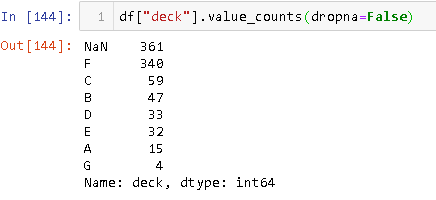

In [337]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck             0
embark_town      2
alive            0
alone            0
dtype: int64

In [338]:
df[["embarked", "embark_town"]].head()
# these two column have same content.Then we can drop one of them.

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton


In [339]:
df.drop("embarked", axis=1, inplace=True)

In [340]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck             0
embark_town      2
alive            0
alone            0
dtype: int64

In [341]:
df["embark_town"].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [342]:
#let's fill nan values with most freqeunt
df["embark_town"].fillna("Southampton", inplace=True)

In [343]:
df["embark_town"].value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [344]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [345]:
df["age"].sort_values()[:5]
# there are a few floating point ages. We will handle with them. Firstly we will fill the an values with average age

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
Name: age, dtype: float64

In [346]:
df["age"].mean()

29.69911764705882

In [347]:
df["age"].fillna(df["age"].mean(), inplace=True)

In [348]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [352]:
#now we can round the ages
df["age"] = df["age"].apply(lambda x: int(np.ceil(x))) # np.ceil(x) is used for rounding up the number
df["age"].sort_values()[:5]

164    1
644    1
755    1
469    1
788    1
Name: age, dtype: int64

In [353]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.771044,0.523008,0.381594,32.529405
std,0.486592,0.836071,13.002476,1.102743,0.806057,49.648684
min,0.000000,1.000000,1.000000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [354]:
df.sort_values("fare")[:5]

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
378,0,3,male,20,0,0,4.0125,Third,man,True,F,Cherbourg,no,True
872,0,1,male,33,0,0,5.0000,First,man,True,B,Southampton,no,True
326,0,3,male,61,0,0,6.2375,Third,man,True,F,Southampton,no,True
843,0,3,male,35,0,0,6.4375,Third,man,True,F,Cherbourg,no,True
818,0,3,male,43,0,0,6.4500,Third,man,True,F,Southampton,no,True


In [15]:
df["survived"] = df["survived"].astype(str) # change type
# df['survived'] = df['survived'].apply(str)   ## other method

In [16]:
df["survived"].dtype

dtype('O')

In [17]:
df["survived"] = pd.to_numeric(df["survived"])

In [18]:
df["survived"].dtype

dtype('int64')

In [19]:
df["embarked"].isnull().sum()

2

In [20]:
df["embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [21]:
df["embarked"].fillna("S", inplace=True)

In [ ]:
#df[df["embarked"]=="S"].index

In [ ]:
#df.drop(df[df["embarked"]=="A"].index, inplace=True) #889 row

In [ ]:
#df.loc[61] # there no such index like 61

In [ ]:
#df.reset_index(drop=True, inplace=True)

In [ ]:
#df.loc[61]

In [22]:
df["deck"].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [ ]:
total = df["deck"].value_counts().sum()

In [ ]:
deck = df["deck"].unique()
deck

In [ ]:
deck = deck[1:]
deck

In [ ]:
class_weight = []
for i in deck:
    class_weight.append((df["deck"]==i).sum() / total)
class_weight

In [ ]:
no_of_fill = []
for i in class_weight:
    no_of_fill.append(int(round(i* 688)))
no_of_fill

In [ ]:
sum(no_of_fill)

In [ ]:
#values = {k:v for k,v in zip(deck,no_of_fill)}
#values

In [ ]:
df["deck"]  = df["deck"].astype("object")


for i,j in zip(deck,no_of_fill):
    df["deck"].fillna(i, limit=j, inplace=True)

#df["deck"].fillna("C", limit=202)

In [ ]:
df["deck"].isnull().sum()

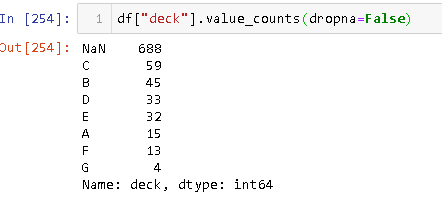

In [ ]:
df["deck"].value_counts(dropna=False)

In [ ]:
print(list(zip(deck,no_of_fill)))

In [ ]:
df["deck"].value_counts().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df["embark_town"].unique()

In [ ]:
df["embark_town"].nunique()

In [ ]:
df["embark_town"].value_counts(dropna=False)

In [ ]:
df[df["embark_town"].isnull()]

In [ ]:
df["embark_town"].fillna("Southampton", inplace=True)

In [ ]:
df["embark_town"].isnull().sum()

In [ ]:
df.info()

In [ ]:
df["age"].describe()

In [ ]:
round(df["age"].mean())

In [ ]:
df["age"].fillna(round(df["age"].mean()), inplace=True)

In [ ]:
df["age"].isnull().sum()

In [ ]:
df.info()

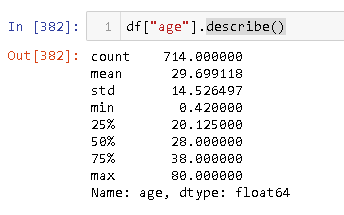

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm" )

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df[["adult_male", "alone"]] = df[["adult_male", "alone"]].astype(int)
df.dtypes

In [ ]:
sns.pairplot(df)

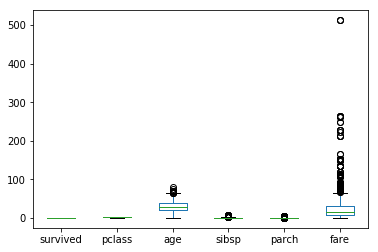

In [23]:
df.plot(kind="box")

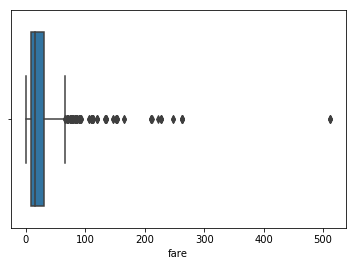

In [27]:
sns.boxplot(df["fare"])

In [28]:
q1 = df["fare"].quantile(0.25)
q1

7.9104

In [29]:
q3 = df["fare"].quantile(0.75)
q3

31.0

In [30]:
iqr =q3 -q1
iqr

23.0896

In [31]:
df.groupby("deck").describe()["fare"]

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,13.0,18.696792,11.728217,7.6500,7.7500,13.00000,26.00000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000


In [59]:
df[df["fare"] < 10]["deck"].value_counts(dropna = False)

NaN    327
F        4
B        3
E        1
A        1
G        0
D        0
C        0
Name: deck, dtype: int64

In [72]:
df[df["fare"] < 10]["deck"].fillna("F", inplace=True)

In [44]:
df[df["deck"]=="A"][["deck","fare"]].sort_values(by="fare")

,deck,fare
806,A,0.0000
284,A,26.0000
630,A,30.0000
174,A,30.6958
209,A,31.0000
96,A,34.6542
23,A,35.5000
647,A,35.5000
556,A,39.6000
583,A,40.1250


In [52]:
A_median = df.groupby("deck").describe()["fare"]["50%"]["A"]

35.5

In [73]:
df.dropna(subset=["age"])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False


In [74]:
import time

In [76]:
birthdate = 1912 -df["age"]
birthdate

0      1890.0
1      1874.0
2      1886.0
3      1877.0
4      1877.0
5         NaN
6      1858.0
7      1910.0
8      1885.0
9      1898.0
10     1908.0
11     1854.0
12     1892.0
13     1873.0
14     1898.0
15     1857.0
16     1910.0
17        NaN
18     1881.0
19        NaN
20     1877.0
21     1878.0
22     1897.0
23     1884.0
24     1904.0
25     1874.0
26        NaN
27     1893.0
28        NaN
29        NaN
        ...  
861    1891.0
862    1864.0
863       NaN
864    1888.0
865    1870.0
866    1885.0
867    1881.0
868       NaN
869    1908.0
870    1886.0
871    1865.0
872    1879.0
873    1865.0
874    1884.0
875    1897.0
876    1892.0
877    1893.0
878       NaN
879    1856.0
880    1887.0
881    1879.0
882    1890.0
883    1884.0
884    1887.0
885    1873.0
886    1885.0
887    1893.0
888       NaN
889    1886.0
890    1880.0
Name: age, Length: 891, dtype: float64

In [77]:
df["birthdate"] = birthdate

In [79]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,birthdate
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1890.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1874.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1886.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1877.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1877.0


In [83]:
df.rename( {"deck":"guverte", "who":"man"},axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,man,adult_male,guverte,embark_town,alive,alone,birthdate
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1890.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1874.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1886.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1877.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1877.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1858.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,1910.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,1885.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1898.0


In [90]:
df["alive"].dtypes

dtype('O')

In [91]:
df["alive"].map({"no":0, "yes":1})

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int64

In [96]:
df["alive"].replace({"yes":1, "no":0})

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int64

In [97]:
df2 = df[["sex", "age"]]
df2

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [55]:
df[df["deck"]=="A"][["deck","fare"]].sort_values(by="fare")

,deck,fare
806,A,0.0000
284,A,26.0000
630,A,30.0000
174,A,30.6958
209,A,31.0000
96,A,34.6542
23,A,35.5000
647,A,35.5000
556,A,39.6000
583,A,40.1250
